In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv(r'C:\Users\naren\Desktop\FlipRobo - Internship\Fake-news-project\Fake news project\train_news.csv')

In [15]:
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [16]:
data.drop(['Unnamed: 0','id','written_by'],axis=1,inplace=True)

In [17]:
data.head()

,headline,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1


In [18]:
data.isnull().sum()

headline    558
news         39
label         0
dtype: int64

In [19]:
data.shape

(20800, 3)

In [20]:
null_columns=data.columns[data.isnull().any()]
print(data[data["headline"].isnull()])

      headline                                               news  label
8          NaN  People have made up their minds on president.\...      1
14         NaN  True. Hillary needs a distraction and what bet...      1
24         NaN  When I attempt to share your stuff on Facebook...      1
56         NaN  The Philippines are doing just fine since kick...      1
72         NaN  Let's see - #1 liar denies knowledge of #2 lia...      1
...        ...                                                ...    ...
20671      NaN  do you need an advanced warning that Lawrence ...      1
20703      NaN  Alas, Tyler, Hillary was/is an unapologetic bo...      1
20738      NaN  So he didn't question where he was sending ema...      1
20748      NaN  The second video (bottom one ) proves what Tru...      1
20795      NaN  No, you'll be a dog licking of the vomit of yo...      1

[558 rows x 3 columns]


In [21]:
data['headline'].replace(np.nan,'No Headline',inplace=True)

In [22]:
data.isnull().sum()

headline     0
news        39
label        0
dtype: int64

In [23]:
data.isnull().sum()

headline     0
news        39
label        0
dtype: int64

In [24]:
data.dropna(axis=0,inplace=True)

In [25]:
data.shape

(20761, 3)

In [26]:
data['label'].value_counts()

0    10387
1    10374
Name: label, dtype: int64

In [27]:
print('fake news ratio',round(len(data[data['label']==1])/len(data.label),2)*100,'%')
print('Authentic news ratio',round(len(data[data['label']==0])/len(data.label),2)*100,'%')

fake news ratio 50.0 %
Authentic news ratio 50.0 %


In [28]:
data

,headline,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1
...,...,...,...
20795,No Headline,"No, you'll be a dog licking of the vomit of yo...",1
20796,Albert Pike and the European Migrant Crisis,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,"It’s officially summer, and the Society Boutiq...",0


In [29]:
data['headline']=data['headline'].str.lower()
data['news']=data['news'].str.lower()

In [30]:
data.head()

,headline,news,label
0,ethics questions dogged agriculture nominee as...,"washington — in sonny perdue’s telling, geo...",0
1,u.s. must dig deep to stop argentina’s lionel ...,houston — venezuela had a plan. it was a ta...,0
2,cotton to house: ’do not walk the plank and vo...,"sunday on abc’s “this week,” while discussing ...",0
3,"paul lepage, besieged maine governor, sends co...","augusta, me. — the beleaguered republican g...",0
4,a digital 9/11 if trump wins,finian cunningham has written extensively on...,1


In [31]:
#Remove Punctuations
data['headline']=data['headline'].str.replace(r'[^\w\d\s]',' ')
data['news']=data['news'].str.replace(r'[^\w\d\s]',' ')

#Replacing additional spaces between words with a single space
data['headline']=data['headline'].str.replace(r'\s+',' ')
data['news']=data['news'].str.replace(r'\s+',' ')

#Repalacing leading and trailing spaces
data['headline']=data['headline'].str.replace(r'^\s+|\s+?$','')
data['news']=data['news'].str.replace(r'^\s+|\s+?$','')

In [32]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english') + ['u'])
data['headline']=data['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

data['news']=data['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))


In [33]:
data.head()

,headline,news,label
0,ethics questions dogged agriculture nominee ge...,washington sonny perdue telling georgians grow...,0
1,must dig deep stop argentina lionel messi new ...,houston venezuela plan tactical approach desig...,0
2,cotton house walk plank vote bill cannot pass ...,sunday abc week discussing republican plan rep...,0
3,paul lepage besieged maine governor sends conf...,augusta beleaguered republican governor maine ...,0
4,digital 9 11 trump wins,finian cunningham written extensively internat...,1


In [34]:
data['news'] = data['headline'] + " " + data['news']
data = data.drop(['headline'], axis=1)

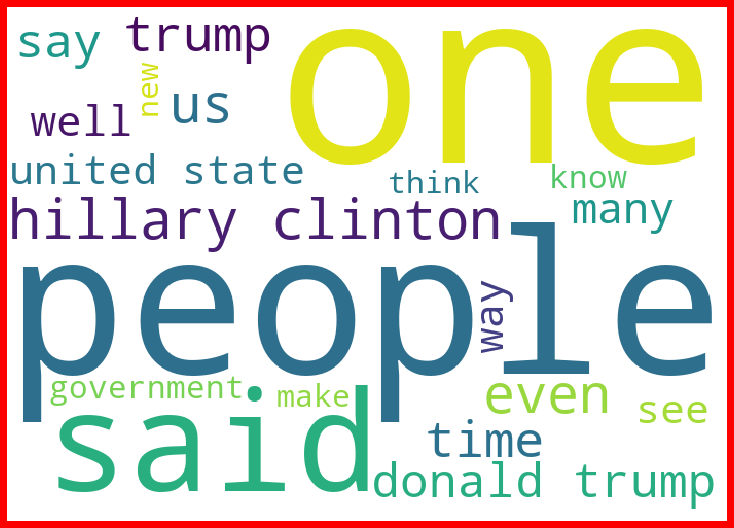

In [35]:
from wordcloud import WordCloud
fake=data['news'][data['label']==1]
fake_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

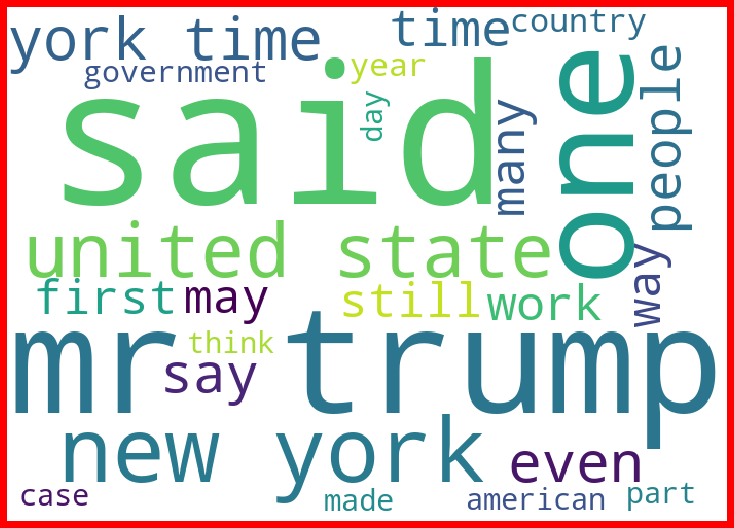

In [36]:
genuine=data['news'][data['label']==0]
genuine_cloud=WordCloud(width=700,height=500,background_color='white',max_words=25).generate(' '.join(genuine))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(genuine_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
data.head()

,news,label
0,ethics questions dogged agriculture nominee ge...,0
1,must dig deep stop argentina lionel messi new ...,0
2,cotton house walk plank vote bill cannot pass ...,0
3,paul lepage besieged maine governor sends conf...,0
4,digital 9 11 trump wins finian cunningham writ...,1


In [38]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['news'],data['label'],test_size=0.2, random_state = 1)

accuracy:   86.275
roc-auc score = 86.40297469611025 %


Classification Report
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      2056
           1       0.99      0.73      0.84      2097

    accuracy                           0.86      4153
   macro avg       0.89      0.86      0.86      4153
weighted avg       0.89      0.86      0.86      4153



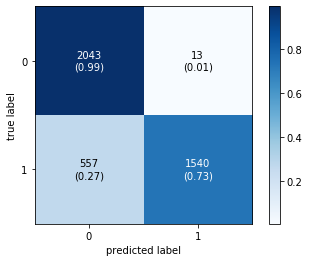

In [48]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc-auc score =',roc_auc)

print('\n')
print('Classification Report\n',classification_report(y_test,prediction))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])




fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   97.399
roc-auc score = 0.9739969226001941


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2056
           1       0.97      0.97      0.97      2097

    accuracy                           0.97      4153
   macro avg       0.97      0.97      0.97      4153
weighted avg       0.97      0.97      0.97      4153



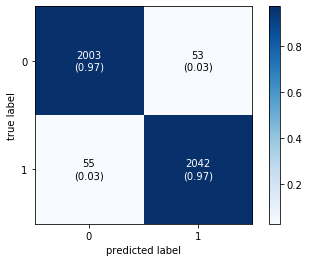

In [49]:
#SVM
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc-auc score =',roc_auc)
print('\n')
print('Classification Report\n',classification_report(y_test,prediction))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


accuracy:   97.351
roc-auc score = 0.9735200508786871


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2056
           1       0.97      0.97      0.97      2097

    accuracy                           0.97      4153
   macro avg       0.97      0.97      0.97      4153
weighted avg       0.97      0.97      0.97      4153



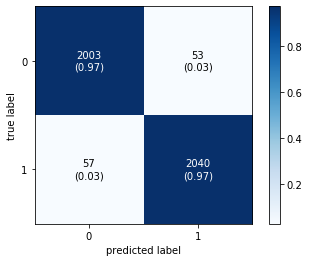

In [50]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc-auc score =',roc_auc)
print('\n')
print('Classification Report\n',classification_report(y_test,prediction))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()